In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import build_resnet
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def format_image(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return  image, label

In [3]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cassava',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [4]:
metadata

tfds.core.DatasetInfo(
    name='cassava',
    version=0.1.0,
    description='Cassava consists of leaf images for the cassava plant depicting healthy and
four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
Dataset consists of a total of 9430 labelled images.
The 9430 labelled images are split into a training set (5656), a test set(1885)
and a validation set (1889). The number of images per class are unbalanced with
the two disease classes CMD and CBSD having 72% of the images.',
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    total_num_examples=9430,
    splits={
        'test': 1885,
        'train': 5656,
        'validation': 1889,
 

In [5]:
num_examples = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes
print(f"number of training examples:{num_examples}, number of classes: {num_classes}")

number of training examples:5656, number of classes: 5


image shape: (32, 224, 224, 3)


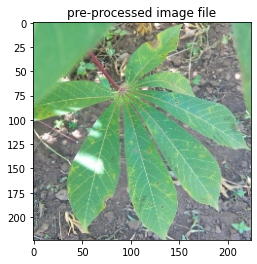

In [6]:
BATCH_SIZE = 32
train_batches = raw_train.shuffle(num_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = raw_validation.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = raw_test.map(format_image).batch(1)

for image_batch, label_batch in train_batches.take(1):
    pass
plt.title("pre-processed image file")
plt.imshow(image_batch[1,:,:,:])

print(f"image shape: {image_batch.shape}")

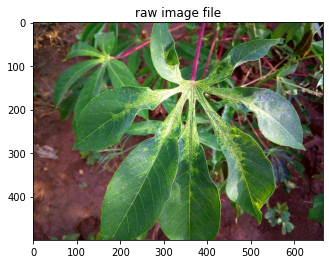

In [14]:
for image_batch in raw_train.take(1):
    pass
plt.title("raw image file")
plt.imshow(image_batch[0])


In [8]:
resnet = build_resnet.build_resnet(num_classes)

In [9]:
resnet.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
hist = resnet.fit(train_batches,
                 epochs=5,
                 validation_data=validation_batches)

Epoch 1/10
142/142 [==============================] - 23s 119ms/step - loss: 2.6072 - accuracy: 0.4488 - val_loss: 1.9125 - val_accuracy: 0.2283
Epoch 2/10
142/142 [==============================] - 16s 113ms/step - loss: 1.1613 - accuracy: 0.6014 - val_loss: 1.8594 - val_accuracy: 0.2301
Epoch 3/10
142/142 [==============================] - 16s 110ms/step - loss: 1.0954 - accuracy: 0.6094 - val_loss: 1.9746 - val_accuracy: 0.4726
Epoch 4/10
142/142 [==============================] - 16s 111ms/step - loss: 1.1085 - accuracy: 0.6113 - val_loss: 1.9238 - val_accuracy: 0.3416
Epoch 5/10
142/142 [==============================] - 16s 109ms/step - loss: 1.0554 - accuracy: 0.6227 - val_loss: 1.3656 - val_accuracy: 0.5327
Epoch 6/10
142/142 [==============================] - 16s 109ms/step - loss: 1.0377 - accuracy: 0.6299 - val_loss: 1.7292 - val_accuracy: 0.3965
Epoch 7/10
142/142 [==============================] - 16s 109ms/step - loss: 1.0355 - accuracy: 0.6207 - val_loss: 5.3564 - val_ac

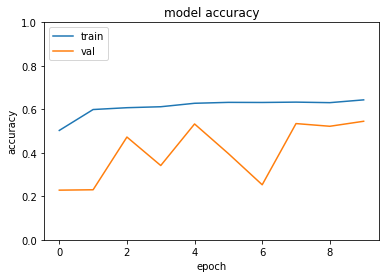

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0, 1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
resnet.evaluate(test_batches)

566/566 [==============================] - 8s 15ms/step - loss: 1.5017 - accuracy: 0.5830


[1.5017050504684448, 0.583038866519928]